# Multi-layer Perceptron classifier

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/tmvis/Downloads/Dataset_spine (1).csv")

In [3]:
data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [4]:
y = data['Class_att']
x = data.drop(['Class_att'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

In [5]:
MLP_classifier = MLPClassifier(random_state = 13, verbose = False)
MLP_classifier.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 13,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [6]:
MLP_classifier.fit(x_train, y_train)

MLPClassifier(random_state=13)

In [7]:
y_pred = MLP_classifier.predict(x_test)
MLP_classifier.score(x_test, y_test)

0.8387096774193549

In [8]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.92      0.83      0.88        42
      Normal       0.71      0.85      0.77        20

    accuracy                           0.84        62
   macro avg       0.81      0.84      0.82        62
weighted avg       0.85      0.84      0.84        62



In [9]:
MLP_classifier_ID = MLPClassifier(activation = 'identity', max_iter = 500,random_state = 13, verbose = False)
MLP_classifier_LG = MLPClassifier(activation = 'logistic', max_iter = 500,random_state = 13, verbose = False)
MLP_classifier_TH = MLPClassifier(activation = 'tanh', max_iter = 500,random_state = 13, verbose = False)
MLP_classifier_ID.fit(x_train, y_train)
MLP_classifier_LG.fit(x_train, y_train)
MLP_classifier_TH.fit(x_train, y_train)

MLPClassifier(activation='tanh', max_iter=500, random_state=13)

In [10]:
y_pred = MLP_classifier_ID.predict(x_test)
print(MLP_classifier_ID.score(x_test, y_test))
report = classification_report(y_test, y_pred)
print(report)

0.8548387096774194
              precision    recall  f1-score   support

    Abnormal       0.95      0.83      0.89        42
      Normal       0.72      0.90      0.80        20

    accuracy                           0.85        62
   macro avg       0.83      0.87      0.84        62
weighted avg       0.87      0.85      0.86        62



In [11]:
y_pred = MLP_classifier_LG.predict(x_test)
print(MLP_classifier_LG.score(x_test, y_test))
report = classification_report(y_test, y_pred)
print(report)

0.8387096774193549
              precision    recall  f1-score   support

    Abnormal       0.90      0.86      0.88        42
      Normal       0.73      0.80      0.76        20

    accuracy                           0.84        62
   macro avg       0.81      0.83      0.82        62
weighted avg       0.84      0.84      0.84        62



In [12]:
y_pred = MLP_classifier_TH.predict(x_test)
print(MLP_classifier_TH.score(x_test, y_test))
report = classification_report(y_test, y_pred)
print(report)

0.8225806451612904
              precision    recall  f1-score   support

    Abnormal       0.90      0.83      0.86        42
      Normal       0.70      0.80      0.74        20

    accuracy                           0.82        62
   macro avg       0.80      0.82      0.80        62
weighted avg       0.83      0.82      0.83        62



In [13]:
MLP_classifier_LG = MLPClassifier(hidden_layer_sizes = (100, 100, 100,),activation = 'logistic', max_iter = 1000,random_state = 13, verbose = False)
MLP_classifier_LG.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100),
              max_iter=1000, random_state=13)

In [14]:
y_pred = MLP_classifier_LG.predict(x_test)
print(MLP_classifier_LG.score(x_test, y_test))
report = classification_report(y_test, y_pred)
print(report)

0.7741935483870968
              precision    recall  f1-score   support

    Abnormal       0.83      0.83      0.83        42
      Normal       0.65      0.65      0.65        20

    accuracy                           0.77        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.77      0.77      0.77        62



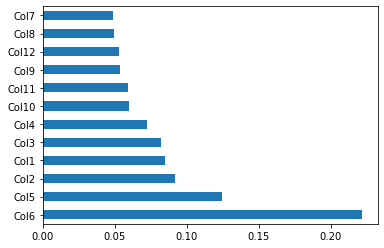

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [16]:
df = pd.read_csv('C:/Users/tmvis/Downloads/Dataset_spine (1).csv')
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [17]:
y = df['Class_att']
x = df.drop(['Class_att'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 13)

In [18]:
clf = MLPClassifier(hidden_layer_sizes = (100,100,100), random_state = 13, activation = 'logistic', verbose = False, validation_fraction = 0.2)                    
clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100),
              random_state=13, validation_fraction=0.2)

In [19]:
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.8064516129032258

In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.83      0.85        42
      Normal       0.68      0.75      0.71        20

    accuracy                           0.81        62
   macro avg       0.78      0.79      0.78        62
weighted avg       0.81      0.81      0.81        62

